In [1]:
#!conda install anaconda::beautifulsoup4
#conda install anaconda::beautifulsoup4 pandas conda-forge::matplotlib seaborn anaconda::seaborn libgfortran numpy

In [2]:
import os

# Define the directory where the HTML files are stored
directory = 'google_scholarhtmls/'

# Use os.listdir to get all file names in the directory
all_files = os.listdir(directory)

# Filter out only HTML files
html_files = [file for file in all_files if file.endswith('.html')]

# Prepend the directory to each file name to get the full path
file_paths = [os.path.join(directory, file) for file in html_files]

file_paths

['google_scholarhtmls/PAGE13_ChatGPT_AND_research_article_Google_Scholar.html',
 'google_scholarhtmls/Research_writing_AND_artificial_ntelligence_Google_Scholar.html',
 'google_scholarhtmls/PAGE25_ChatGPT_AND_research_article_Google_Scholar.html',
 'google_scholarhtmls/PAGE9_ChatGPT_AND_research_article_Google_Scholar.html',
 'google_scholarhtmls/PAGE11_ChatGPT_AND_research_article_Google_Scholar.html',
 'google_scholarhtmls/PAGE23_ChatGPT_AND_research_article_Google_Scholar.html',
 'google_scholarhtmls/PAGE17_ChatGPT_AND_research_article_Google_Scholar.html',
 'google_scholarhtmls/PAGE15_ChatGPT_AND_research_article_Google_Scholar.html',
 'google_scholarhtmls/PAGE19_ChatGPT_AND_researcharticle_Google Scholar.html',
 'google_scholarhtmls/PAGE5_ChatGPT_ AND_research_article_Google_Scholar.html',
 'google_scholarhtmls/PAGE2_ChatGPT_AND_research_article_Google_Scholar.html',
 'google_scholarhtmls/PAGE21_ChatGPT_AND_research_article_Google Scholar.html',
 'google_scholarhtmls/PAGE18_ChatGP

In [3]:
# Fixed code to correctly iterate over each HTML file and extract article information

import os
from bs4 import BeautifulSoup

# Define the directory where the HTML files are stored
directory = 'google_scholarhtmls/'  # Ensure this directory is correct and exists

# Use os.listdir to get all file names in the directory
all_files = os.listdir(directory)

# Filter out only HTML files
html_files = [file for file in all_files if file.endswith('.html')]

# Prepend the directory to each file name to get the full path
file_paths = [os.path.join(directory, file) for file in html_files]

# Initialize an empty list to store data from all articles across files
corrected_data = []

# Iterate over each file path
for file_path in file_paths:
    # Load the HTML content for each file
    with open(file_path, 'r') as file:
        html_content = file.read()

    # Parse the HTML content
    soup = BeautifulSoup(html_content, 'html.parser')

    # Find all article entries in the current document
    articles = soup.find_all('div', class_='gs_ri')

    # Extract information for each article within the current file
    for article in articles:
        title = article.find('h3', class_='gs_rt').text if article.find('h3', class_='gs_rt') else 'No title available'
        author_info = article.find('div', class_='gs_a').text if article.find('div', class_='gs_a') else 'No author information available'
        
        # Initialize default values
        year = "No year available"
        authors = "No author information available"
        journal_name = "No journal name available"
        
        # Attempt to extract author, year, and journal name
        try:
            # Extract year
            year = [int(s) for s in author_info.split() if s.isdigit()][-1]
            # Extract authors and journal name
            parts = author_info.rsplit('-', 1)
            if len(parts) > 1:
                authors = parts[0].strip()
                journal_info = parts[1].strip()
                journal_name = journal_info.rsplit(',', 1)[0].strip()
        except Exception as e:
            pass  # Keep default values if extraction fails

        corrected_data.append({
            "article name": title,
            "year published": year,
            "Author": authors,
            "Journal name": journal_name
        })

print("Number of records extracted:", len(corrected_data))
# Display the first 5 records as a sample
corrected_data[:5]

Number of records extracted: 520


[{'article name': '[PDF][PDF] An investigation on the characteristics, abilities, constraints, and functions of artificial intelligence (ai): The age of chatgpt as an essential',
  'year published': 2023,
  'Author': 'J Wiredu\xa0- Information and Management, 2023',
  'Journal name': 'researchgate.net'},
 {'article name': '[PDF][PDF] Radiology gets chatty: the ChatGPT saga unfolds',
  'year published': 2023,
  'Author': 'H Grewal, G Dhillon, V Monga, P Sharma…\xa0- Cureus, 2023',
  'Journal name': 'cureus.com'},
 {'article name': 'The era of artificial intelligence: talking about the potential application value of ChatGPT/GPT-4 in foot and ankle surgery',
  'year published': 2024,
  'Author': 'D Wang, Y He, Y Ma, H Wu, G Ni\xa0- The Journal of Foot and Ankle Surgery, 2024',
  'Journal name': 'jfas.org'},
 {'article name': '“Dr ChatGPT”: Is it a reliable and useful source for common rheumatic diseases?',
  'year published': 2023,
  'Author': 'C Uz, E Umay\xa0- International Journal of R

In [4]:
import pandas as pd

# Convert the corrected data into a DataFrame
scholar_df = pd.DataFrame(corrected_data)

# Display the DataFrame
print(scholar_df.info())
scholar_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   article name    520 non-null    object
 1   year published  520 non-null    object
 2   Author          520 non-null    object
 3   Journal name    520 non-null    object
dtypes: object(4)
memory usage: 16.4+ KB
None


,article name,year published,Author,Journal name
0,[PDF][PDF] An investigation on the characteris...,2023,"J Wiredu - Information and Management, 2023",researchgate.net
1,[PDF][PDF] Radiology gets chatty: the ChatGPT ...,2023,"H Grewal, G Dhillon, V Monga, P Sharma… - Cure...",cureus.com
2,The era of artificial intelligence: talking ab...,2024,"D Wang, Y He, Y Ma, H Wu, G Ni - The Journal o...",jfas.org
3,“Dr ChatGPT”: Is it a reliable and useful sour...,2023,"C Uz, E Umay - International Journal of Rheuma...",Wiley Online Library
4,Transparency in research: an analysis of ChatG...,2023,"R Raman - Accountability in Research, 2023",Taylor & Francis


In [5]:
# # encoding=utf8
# from importlib import reload
# import sys
# reload(sys)
# sys.setdefaultencoding('utf8')

In [6]:
import os  
#scholar_df.to_csv('google_scholar_chatgptdataset.csv', index=False)
scholar_df.size

2080

In [11]:
# Replace 'your_file.csv' with the path to your actual CSV file
file_path = 'google_scholar_chatgptdataset.csv'
df = pd.read_csv(file_path, sep=',')  # For a tab-delimited file

# Display the first few rows of the DataFrame
df.head()

,article name,year published,Author,Journal name
0,The era of artificial intelligence: talking ab...,2024,"D Wang, Y He, Y Ma, H Wu, G Ni - The Journal o...",jfas.org
1,Exploring opportunities and challenges of usin...,2024,"A Bekou, MB Mhamed, K Assissou - Focus on ELT ...",focusonelt.com
2,[HTML][HTML] Comparison of the Performance of ...,2024,"A Meyer, J Riese, T Streichert - JMIR Medical ...",mededu.jmir.org
3,Exploring the bioethical implications of using...,2024,"S Shivananda, VG Doddawad, CS Vidya… - … in Cl...",journals.lww.com
4,[HTML][HTML] Using artificial intelligence in ...,2024,"M Khalifa, M Albadawy - Computer Methods and P...",Elsevier


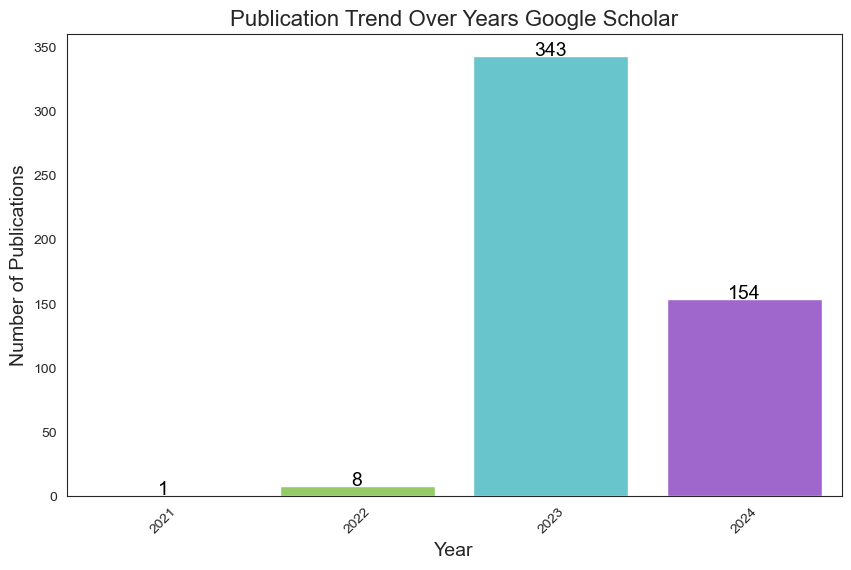

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Ensure 'year published' is of type int
df['year published'] = pd.to_numeric(df['year published'])

# Continue with your plotting as before
yearly_counts = df['year published'].value_counts().sort_index()
yearly_counts_df = yearly_counts.reset_index()
yearly_counts_df.columns = ['Year', 'Number of Publications']

sns.set_style("white")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Number of Publications', data=yearly_counts_df, palette='hls')

# Add labels on top of each bar
for index, row in yearly_counts_df.iterrows():
    ax.text(index, row['Number of Publications'], row['Number of Publications'], color='black', ha="center", fontsize=14)

plt.title('Publication Trend Over Years Google Scholar', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Publications', fontsize=14)
plt.xticks(rotation=45)

# Save the figure
plt.savefig('publication_trend_google_scholar.png')

plt.show()

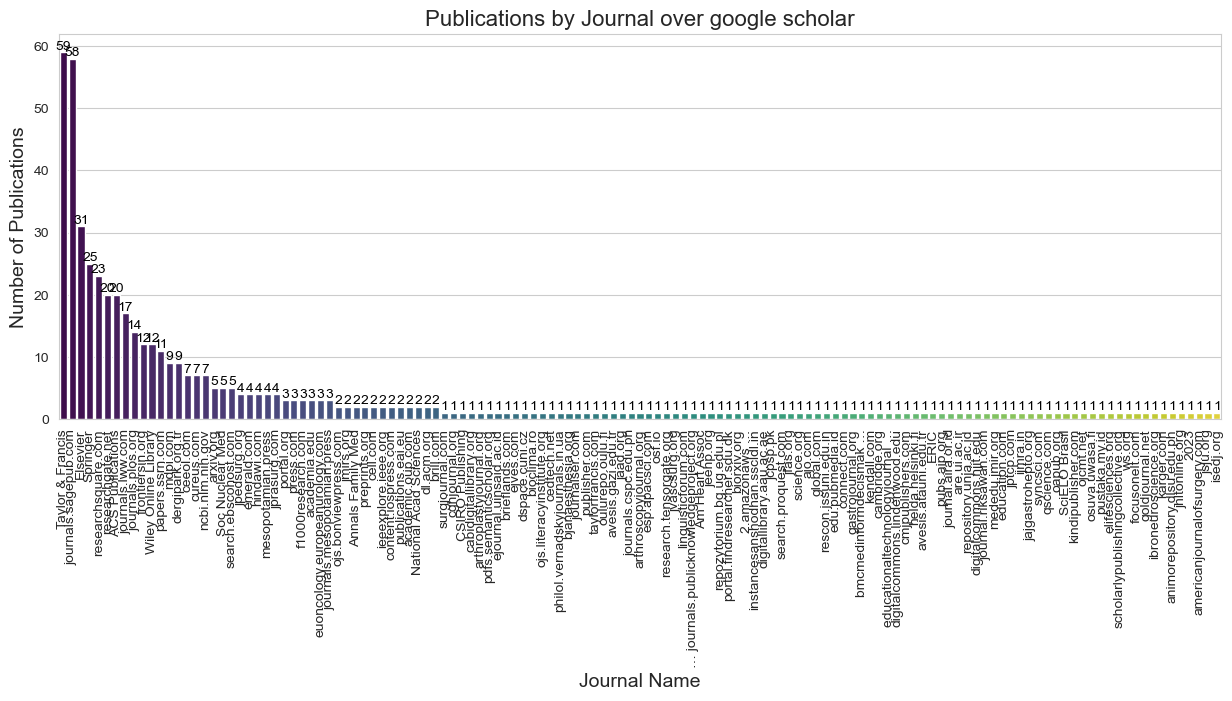

In [14]:
# Count the number of publications per journal
journal_counts = df['Journal name'].value_counts().reset_index()
journal_counts.columns = ['Journal Name', 'Number of Publications']

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(15, 5))

# Create a barplot
ax = sns.barplot(x='Journal Name', y='Number of Publications', data=journal_counts, palette='viridis')

# Add titles and labels
plt.title('Publications by Journal over google scholar', fontsize=16)
plt.xlabel('Journal Name', fontsize=14)
plt.ylabel('Number of Publications', fontsize=14)

# Improve the x-ticks rotation for better readability
plt.xticks(rotation=90)

# Add labels on top of each bar
for index, row in journal_counts.iterrows():
    ax.text(index, row['Number of Publications'], row['Number of Publications'], color='black', ha="center", va='bottom')

plt.show()

The dataset primarily consists of columns for "Author," "Journal name," "article name," and "year published." It appears that some records do not have information available for the author, journal name, or year published. Given this structure, we can conduct several analyses:

Yearly Publication Trend: Analyze how the number of publications related to ChatGPT with scientific writings has changed over the years.
Publication Count by Journal: Identify which journals have published the most articles on this topic.
Analysis of Author Contributions: Explore which authors have contributed most to the field, though it seems there might be limitations due to the presence of records with 'No author information available'.
Let's start by cleaning the data slightly and then proceed with creating the plots for the first two analyses since the third analysis might not provide meaningful insights due to missing data.

Cleaning Data
We'll exclude records with 'No journal name available' or 'No year available' for the respective analyses.

Yearly Publication Trend

Publication Count by Journal

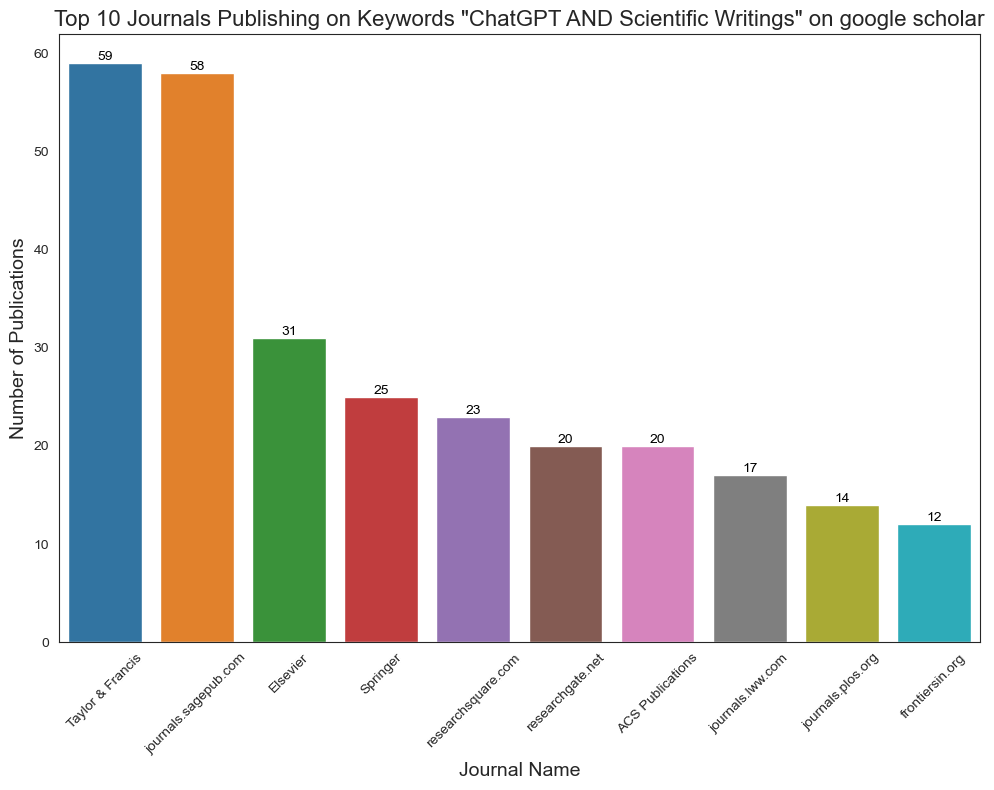

In [15]:
# Exclude records with 'No journal name available'
df_journals = df[df['Journal name'] != 'No journal name available']

# Count the number of publications per journal and get the top 10
journal_counts = df_journals['Journal name'].value_counts().head(10).reset_index()
journal_counts.columns = ['Journal Name', 'Number of Publications']

# Set the aesthetic style of the plots
sns.set_style("white")

# Initialize the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a barplot
ax = sns.barplot(x='Journal Name', y='Number of Publications', data=journal_counts, palette='tab10')

# Add titles and labels
plt.title('Top 10 Journals Publishing on Keywords "ChatGPT AND Scientific Writings" on google scholar', fontsize=16)
plt.xlabel('Journal Name', fontsize=14)
plt.ylabel('Number of Publications', fontsize=14)

# Improve the x-ticks rotation for better readability
plt.xticks(rotation=45)

# Add labels on top of each bar
for index, row in journal_counts.iterrows():
    ax.text(index, row['Number of Publications'], row['Number of Publications'], color='black', ha="center", va='bottom')

plt.tight_layout()

# Save the figure
plt.savefig("Top10_Google_PublicationType.png")

plt.show()



A bar chart showing the trend of publications related to ChatGPT and scientific writings over the years, helping to visualize how interest in this area has evolved.

A bar chart displaying the top 10 journals that have published articles on ChatGPT and scientific writings, highlighting the primary outlets for this research.

These visualizations would offer insights into the growth of research related to ChatGPT within the academic community and identify key journals contributing to the discourse. For actual execution and visualization, please ensure you're running this code in a Python environment with the necessary libraries (pandas, matplotlib) installed and correctly configured.</h3>

<h1> PUBMED dataset with chatgpt </h1>

In [17]:
import os
from bs4 import BeautifulSoup
import pandas as pd
import re

# Assuming all HTML files are stored in a folder named 'pubmed' within the '/mnt/data/' directory
directory_path = 'pubmed_chatgpt/pubmed/'

# List all files in the directory
html_files = [file for file in os.listdir(directory_path) if file.endswith('.html')]

# Define journal types
journal_types = [
    "Books and Documents", "Meta-Analysis",
    "Review", "Systematic Review", "Editorial"
]

# Initialize a list to store all records from all files
all_records = []

# Iterate over each HTML file in the directory
for html_file in html_files:
    file_path = os.path.join(directory_path, html_file)
    
    # Load and parse the HTML content
    with open(file_path, "r") as file:
        html_content = file.read()
    
    soup = BeautifulSoup(html_content, 'html.parser')
    text_content = soup.get_text()

    # Split the content based on PMID as the start of each entry
    entries = re.split(r'\nPMID- ', text_content)[1:]  # Skip the first element as it's not an entry
    
    for entry in entries:
        # Initialize default values
        journal_type = "Research Article"
        year = "No Year"
        title = "No Title"
        journal = "No Journal"
        
        # Determine journal type
        for j_type in journal_types:
            if j_type in entry:
                journal_type = j_type
                break
        
        # Extract year, title, and journal using regex
        year_match = re.search(r'DP  - (\d{4})', entry)
        title_match = re.search(r'TI  - ([^\n]+)', entry)
        journal_match = re.search(r'JT  - ([^\n]+)', entry)
        
        # Extracting text if matches are found or using defaults
        year = year_match.group(1) if year_match else "No Year"
        title = title_match.group(1) if title_match else "No Title"
        journal = journal_match.group(1) if journal_match else "No Journal"
        
        all_records.append({
            "JournalType": journal_type,
            "YEAR": year,
            "TITLE": title,
            "JOURNAL": journal
        })

In [18]:
# Convert the list of dictionaries to a DataFrame
df_pubmed_all = pd.DataFrame(all_records)

df_pubmed_all.head()

,JournalType,YEAR,TITLE,JOURNAL
0,Research Article,2024,Assessment of ChatGPT's adherence to ETA-thyro...,Endocrine
1,Research Article,2023,Langerhans Cell Histiocytosis Presenting With ...,Cureus
2,Research Article,2023,"Can ChatGPT, an Artificial Intelligence Langua...",Urology
3,Research Article,2023,Generating Informed Consent Documents Related ...,Ophthalmic plastic and reconstructive surgery
4,Research Article,2023,Comparing ChatGPT and GPT-4 performance in USM...,Scientific reports


In [19]:
import os
from bs4 import BeautifulSoup
import pandas as pd
import re

# Assuming all HTML files are stored in a folder named 'pubmed' within the '/mnt/data/' directory
directory_path = 'pubmed_chatgpt/pubmed/'

# List all files in the directory
html_files = [file for file in os.listdir(directory_path) if file.endswith('.html')]

# Define journal types
journal_types = [
    "Books and Documents", "Meta-Analysis",
    "Journal Article", "Review", "Systematic Review", "Editorial"
]

# Initialize a list to store all records from all files
all_records = []

# Iterate over each HTML file in the directory
for html_file in html_files:
    file_path = os.path.join(directory_path, html_file)
    
    # Load and parse the HTML content
    with open(file_path, "r") as file:
        html_content = file.read()
    
    soup = BeautifulSoup(html_content, 'html.parser')
    text_content = soup.get_text()

    # Split the content based on PMID as the start of each entry
    entries = re.split(r'\nPMID- ', text_content)[1:]  # Skip the first element as it's not an entry
    
    for entry in entries:
        # Initialize default values
        journal_type = "No Article"
        year = "No Year"
        title = "No Title"
        journal = "No Journal"
        
        # Extract year, title, and journal using regex
        year_match = re.search(r'DP  - (\d{4})', entry)
        title_match = re.search(r'TI  - ([^\n]+)', entry)
        journal_match = re.search(r'JT  - ([^\n]+)', entry)
        journal_type_match = re.search(r'PT  - ([^\n]+)', entry)
        
        # Extracting text if matches are found or using defaults
        year = year_match.group(1) if year_match else year
        title = title_match.group(1) if title_match else title
        journal = journal_match.group(1) if journal_match else journal
        journal_type = journal_type_match.group(1) if journal_type_match else journal_type
        
        all_records.append({
            "JournalType": journal_type,
            "YEAR": year,
            "TITLE": title,
            "JOURNAL": journal
        })

# Convert all_records to a DataFrame
df_pubmed_all = pd.DataFrame(all_records)
df_pubmed_all.size

11376

In [20]:
df_pubmed_all.head()

,JournalType,YEAR,TITLE,JOURNAL
0,Journal Article,2024,Assessment of ChatGPT's adherence to ETA-thyro...,Endocrine
1,Case Reports,2023,Langerhans Cell Histiocytosis Presenting With ...,Cureus
2,Journal Article,2023,"Can ChatGPT, an Artificial Intelligence Langua...",Urology
3,Journal Article,2023,Generating Informed Consent Documents Related ...,Ophthalmic plastic and reconstructive surgery
4,Journal Article,2023,Comparing ChatGPT and GPT-4 performance in USM...,Scientific reports


To perform data analysis and plot the results from the dataset you've created from PubMed HTML files, we'll focus on a few key types of analysis and visualization that can be insightful. This includes analyzing the distribution of articles by journal type, the publication trend over years, and the distribution of articles among journals. Note that the actual execution of this code requires a successful extraction of data into a DataFrame, which we'll assume is stored in df_pubmed_all.

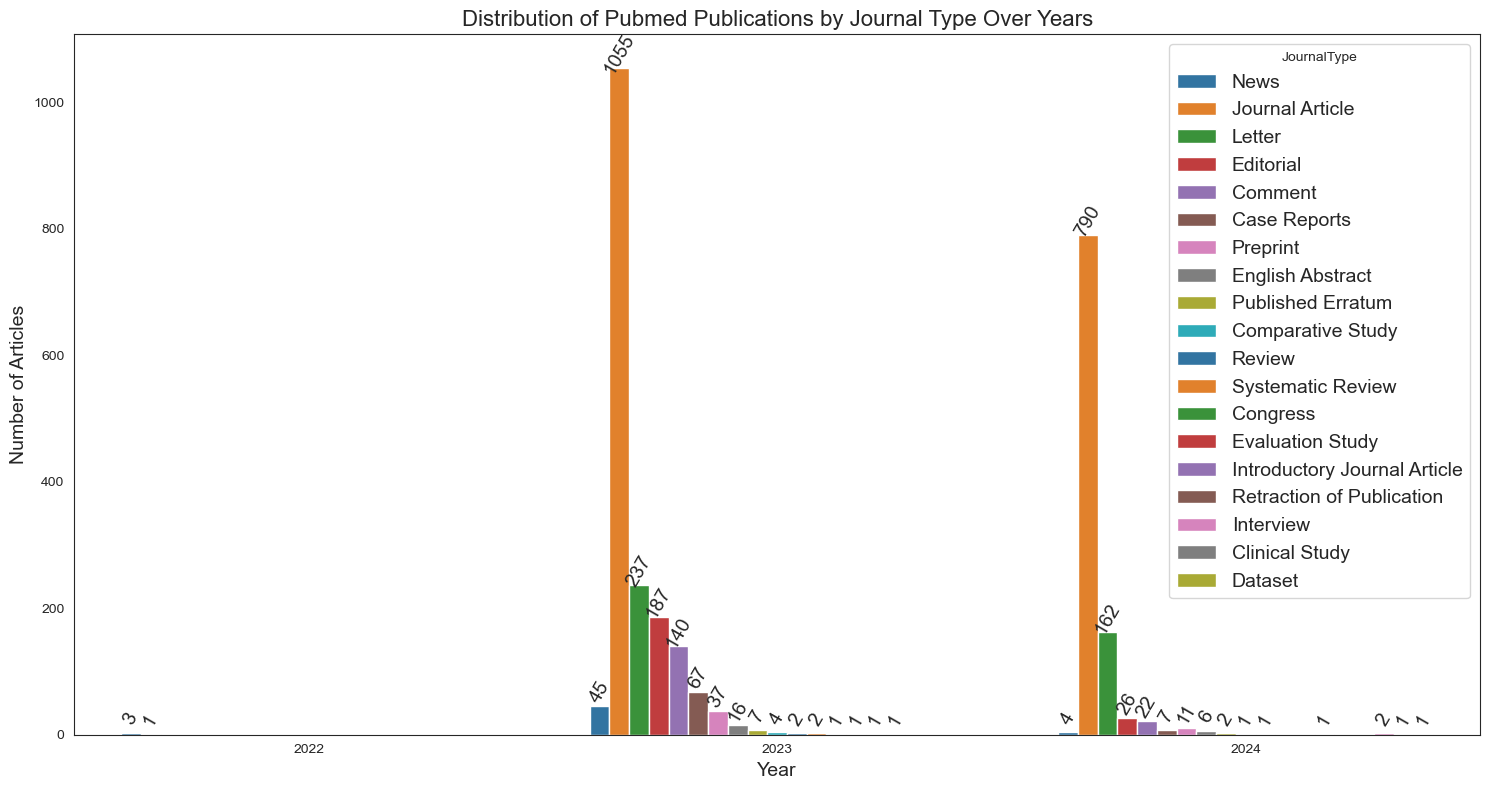

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_pubmed_all is your DataFrame and it has a 'YEAR' column

# Group by 'YEAR' and 'JournalType' and count the publications
yearly_type_counts = df_pubmed_all.groupby(['YEAR', 'JournalType']).size().reset_index(name='Number of Articles')

# Sort the DataFrame for better visualization (optional)
yearly_type_counts.sort_values(by=['YEAR', 'Number of Articles'], ascending=[True, False], inplace=True)

# Set the aesthetic style of the plots
sns.set_style("white")

# Initialize the matplotlib figure
plt.figure(figsize=(15, 8))

# Create a bar plot
ax = sns.barplot(x='YEAR', y='Number of Articles', hue='JournalType', data=yearly_type_counts, palette='tab10')

# Add titles and labels
plt.title('Distribution of Pubmed Publications by Journal Type Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
# Add the legend
plt.legend(title='JournalType', fontsize=14)

# Annotate each bar with the number of articles
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10),  # 10 points vertical offset
                textcoords = 'offset points', fontsize = 14, rotation=60)

plt.tight_layout()  # Adjust layout

# Save the figure
plt.savefig("Pubmed_ArticleType_Yearly.png")

plt.show()

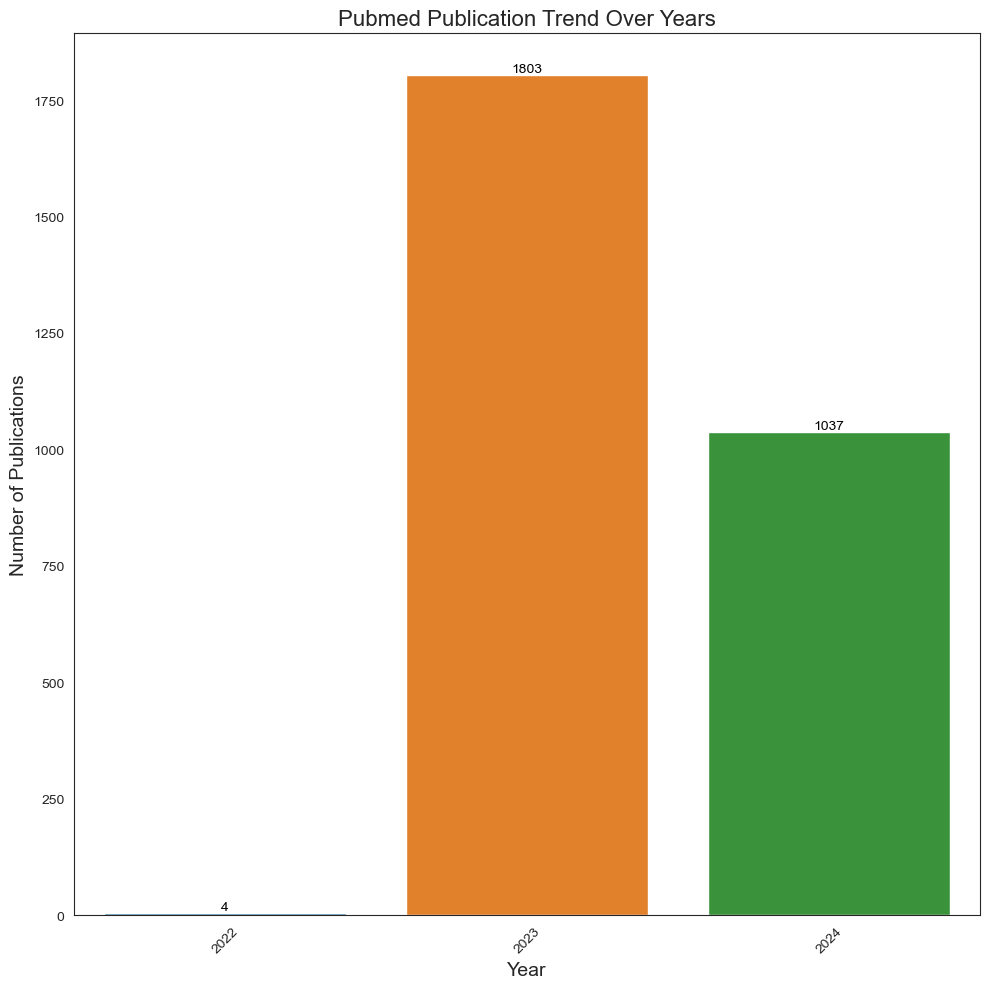

In [22]:
# Convert 'YEAR' to numeric, ignoring errors and dropping NA values
df_pubmed_all['YEAR'] = pd.to_numeric(df_pubmed_all['YEAR'], errors='coerce')
df_pubmed_all.dropna(subset=['YEAR'], inplace=True)
df_pubmed_all['YEAR'] = df_pubmed_all['YEAR'].astype(int)  # Convert to integer

# Counting publications per year and preparing for seaborn
year_counts = df_pubmed_all['YEAR'].value_counts().sort_index().reset_index()
year_counts.columns = ['Year', 'Number of Publications']

# Set the aesthetic style of the plots
sns.set_style("white")

# Initialize the matplotlib figure
plt.figure(figsize=(10, 10))

# Create a bar plot
ax = sns.barplot(x='Year', y='Number of Publications', data=year_counts)#, color='red')

# Add titles and labels
plt.title('Pubmed Publication Trend Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Publications', fontsize=14)

# Improve the x-ticks rotation for better readability
plt.xticks(rotation=45)

# Optional: Annotate each bar with the number of articles
for index, row in year_counts.iterrows():
    ax.text(index, row['Number of Publications'], row['Number of Publications'], color='black', ha="center", va='bottom')

plt.tight_layout()

# Save the figure
plt.savefig("Top10PubmedYear.png")

plt.show()

In [23]:
# Get top 10 journals by number of publications

# Rename specific journal for clarity using regular expression for case-insensitive replace
df_pubmed_all['JOURNAL'] = df_pubmed_all['JOURNAL'].str.replace(
    r'European archives of oto-rhino-laryngology : official journal of the European', 
    'European Archives of Oto-Rhino-Laryngology', 
    case=False, regex=True
)

top_journals_pub = df_pubmed_all['JOURNAL'].value_counts().head(10).reset_index()
top_journals_pub.columns = ['Journal', 'Number of Publications']


print(top_journals_pub)

                                             Journal  Number of Publications
0                                             Cureus                     184
1                   Annals of biomedical engineering                      69
2                             JMIR medical education                      58
3                                             Nature                      49
4  International journal of surgery (London, Engl...                      39
5                                 Scientific reports                      34
6               Journal of medical Internet research                      33
7        European Archives of Oto-Rhino-Laryngology                       28
8  medRxiv : the preprint server for health sciences                      24
9                          Aesthetic plastic surgery                      23


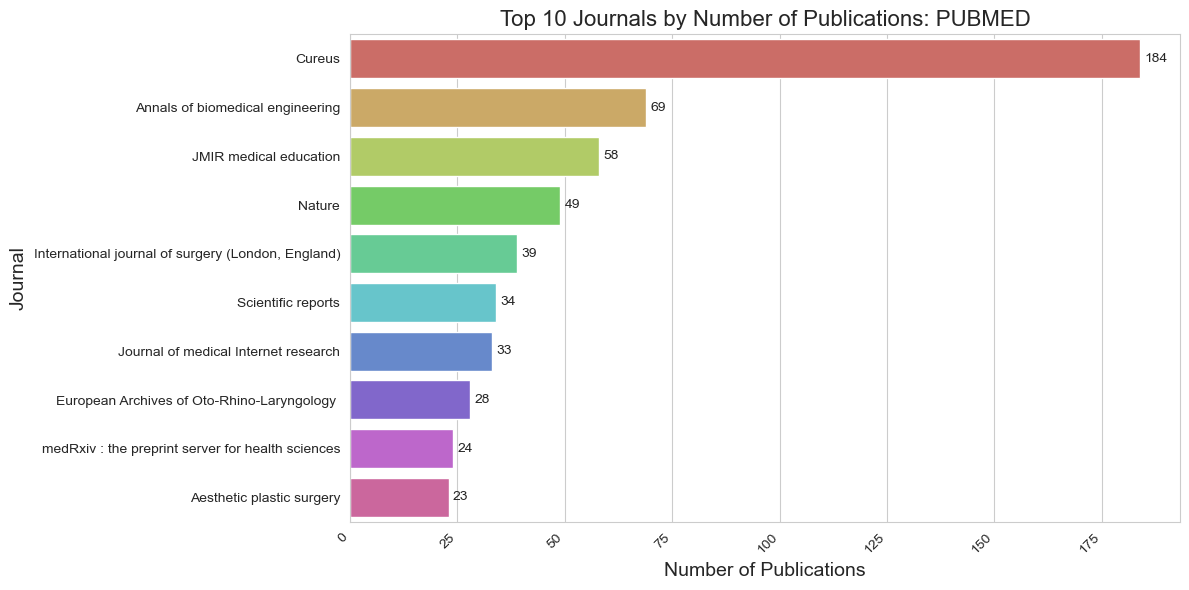

In [24]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a bar plot
ax = sns.barplot(x='Number of Publications', y='Journal', data=top_journals_pub, palette='hls', orient='h')

# Add titles and labels
plt.title('Top 10 Journals by Number of Publications: PUBMED', fontsize=16)
plt.xlabel('Number of Publications', fontsize=14)
plt.ylabel('Journal', fontsize=14)

# Improve the x-ticks rotation for better readability
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the number of publications
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1,  # Position the text slightly right of the bar end
             p.get_y() + p.get_height() / 2,  # Position text at the vertical center of the bar
             '{:1.0f}'.format(width),  # Number of publications
             va='center')

plt.tight_layout()

# Save the figure
plt.savefig("Top10journals_pubmed.png")

plt.show()

In [25]:
#!conda install numpy

In [26]:
#Rename df with top 10 publication from google
top_journals_goo = journal_counts
top_journals_goo = top_journals_goo.rename(columns={"Journal Name": "Journal"})
top_journals_goo

,Journal,Number of Publications
0,Taylor & Francis,59
1,journals.sagepub.com,58
2,Elsevier,31
3,Springer,25
4,researchsquare.com,23
5,researchgate.net,20
6,ACS Publications,20
7,journals.lww.com,17
8,journals.plos.org,14
9,frontiersin.org,12


In [27]:
top_journals_pub

,Journal,Number of Publications
0,Cureus,184
1,Annals of biomedical engineering,69
2,JMIR medical education,58
3,Nature,49
4,"International journal of surgery (London, Engl...",39
5,Scientific reports,34
6,Journal of medical Internet research,33
7,European Archives of Oto-Rhino-Laryngology,28
8,medRxiv : the preprint server for health sciences,24
9,Aesthetic plastic surgery,23


In [28]:
# Add a 'Source' column to each dataframe
top_journals_goo['Source'] = 'Google Scholar'
top_journals_pub['Source'] = 'PubMed'

# Step 2: Concatenate the dataframes
combined_data = pd.concat([top_journals_goo, top_journals_pub], ignore_index=True)
combined_data
# Now sort the combined DataFrame by 'Number of Publications' in descending order
combined_data_sorted = combined_data.sort_values(by='Number of Publications', ascending=False)
combined_data_sorted

,Journal,Number of Publications,Source
10,Cureus,184,PubMed
11,Annals of biomedical engineering,69,PubMed
0,Taylor & Francis,59,Google Scholar
12,JMIR medical education,58,PubMed
1,journals.sagepub.com,58,Google Scholar
13,Nature,49,PubMed
14,"International journal of surgery (London, Engl...",39,PubMed
15,Scientific reports,34,PubMed
16,Journal of medical Internet research,33,PubMed
2,Elsevier,31,Google Scholar


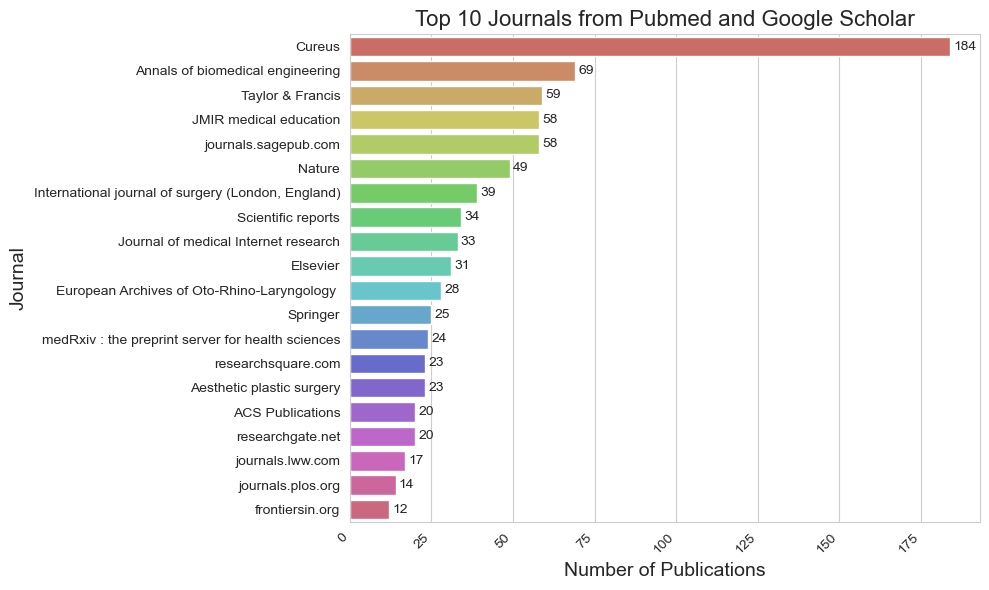

In [29]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot
ax = sns.barplot(x='Number of Publications', y='Journal', data=combined_data_sorted, palette='hls', orient='h')

# Add titles and labels
plt.title('Top 10 Journals from Pubmed and Google Scholar', fontsize=16)
plt.xlabel('Number of Publications', fontsize=14)
plt.ylabel('Journal', fontsize=14)

# Improve the x-ticks rotation for better readability
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the number of publications
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1,  # Position the text slightly right of the bar end
             p.get_y() + p.get_height() / 2,  # Position text at the vertical center of the bar
             '{:1.0f}'.format(width),  # Number of publications
             va='center')

plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

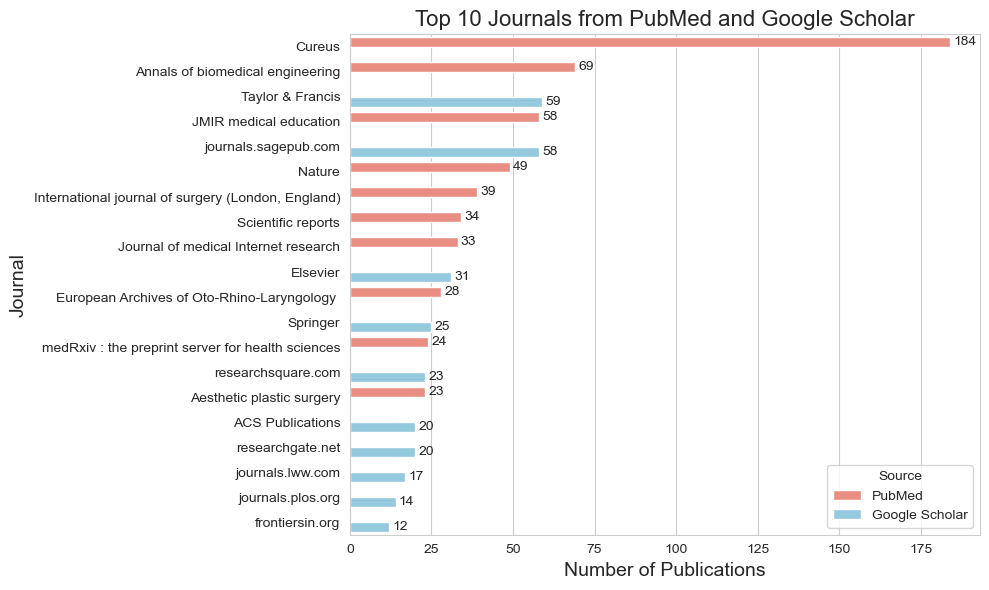

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Define a color palette for the two sources
source_palette = {"Google Scholar": "skyblue", "PubMed": "salmon"}

# Create a bar plot with 'Source' as the hue
ax = sns.barplot(
    x='Number of Publications', 
    y='Journal', 
    hue='Source', 
    data=combined_data_sorted, 
    palette=source_palette, 
    orient='h'
)

# Add titles and labels
plt.title('Top 10 Journals from PubMed and Google Scholar', fontsize=16)
plt.xlabel('Number of Publications', fontsize=14)
plt.ylabel('Journal', fontsize=14)

# Add the legend
plt.legend(title='Source')

# Annotate each bar with the number of publications
for p in ax.patches:
    width = p.get_width()
    plt.text(
        width + 1,  # Position the text slightly right of the bar end
        p.get_y() + p.get_height() / 2,  # Position text at the vertical center of the bar
        '{:1.0f}'.format(width),  # Number of publications
        va='center'
    )

plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

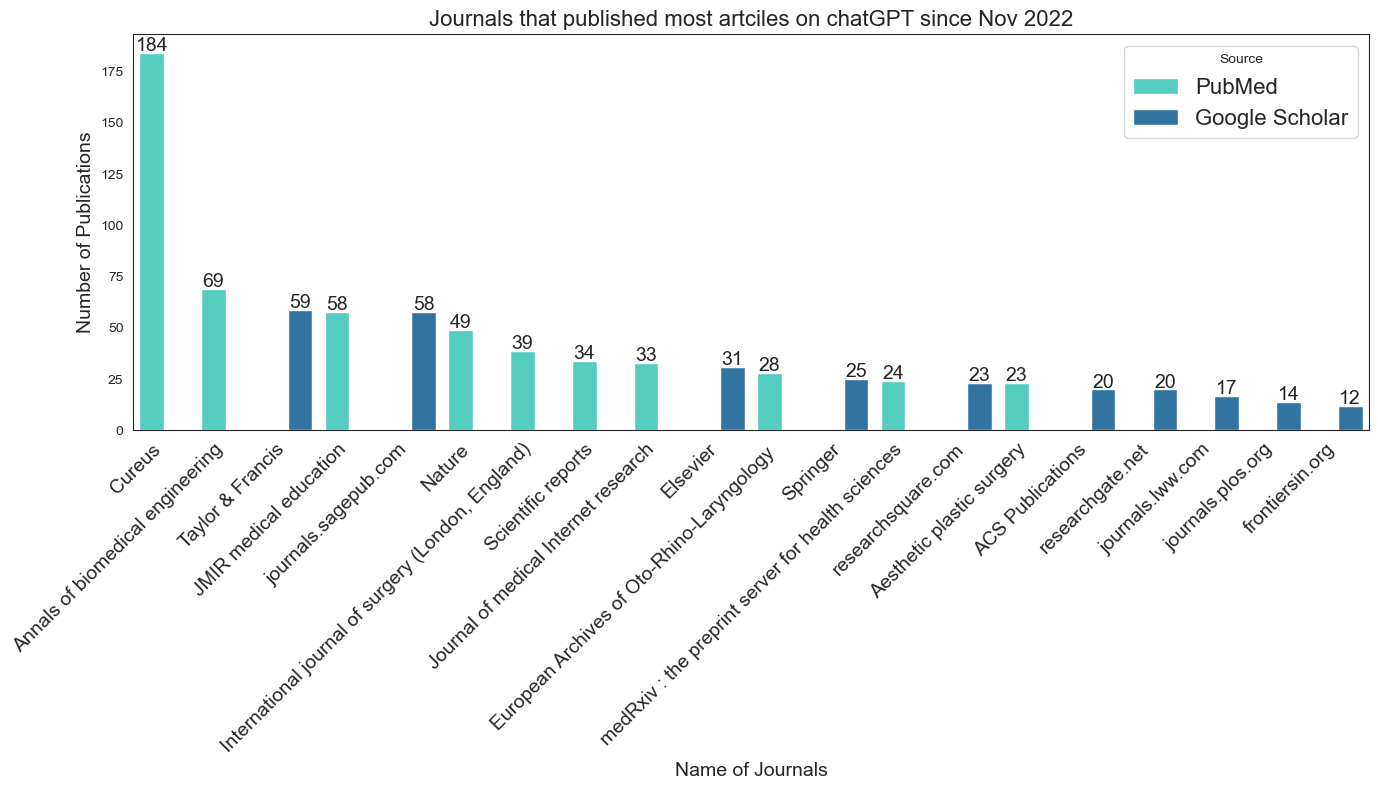

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("white")

# Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# Define a color palette for the two sources
#source_palette = {"Google Scholar": "skyblue", "PubMed": "salmon"}
#source_palette = {"Google Scholar": "#1f77b4", "PubMed": "#ff7f0e"}
#source_palette = {"Google Scholar": "#2ca02c", "PubMed": "#d62728"}
source_palette = {"Google Scholar": "#1f77b4", "PubMed": "turquoise"}

# Create a vertical bar plot without 'orient' parameter (default is vertical)
ax = sns.barplot(
    y='Number of Publications', 
    x='Journal', 
    hue='Source', 
    data=combined_data_sorted, 
    palette=source_palette
)

# Add titles and labels
plt.title('Journals that published most artciles on chatGPT since Nov 2022', fontsize=16)
plt.ylabel('Number of Publications', fontsize=14)
plt.xlabel('Name of Journals', fontsize=14)

# Improve the x-ticks rotation for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)

# Add the legend
plt.legend(title='Source', fontsize=16)

# Annotate each bar with the number of publications
for p in ax.patches:
    height = p.get_height()
    plt.text(
        p.get_x() + p.get_width() / 2,  # Position text at the horizontal center of the bar
        #height + 1,  # Position the text slightly above the bar top
        height-1,  # Position the text slightly above the bar top
        '{:1.0f}'.format(height),  # Number of publications
        ha='center', va='bottom', fontsize =14
    )

plt.tight_layout()

# Save the figure
plt.savefig("compare_journals_pub_goo.png")

plt.show()